In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from modules.preprocess_text import preprocess_text

# removes chained assignment warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# pair listing.csv features with matches csv

In [2]:
path = '../data/casaData/'
df_listings = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_28483/196199595.py:2: DtypeWarning: Columns (0,4,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])


In [3]:
df_listings.head(7)

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude
0,1,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN
1,2,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN
2,3,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN
3,4,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN
4,5,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN
5,6,8.0,84.0,5.0,26500000.0,NaN,10.0,16.0,4000.0,NaN,820000.0,NaN,Unique Majorcan Rural Estate in Puigpunyent,"Description\n\t\t\t\tThis magnificent, totally...",NaN,NaN,NaN
6,7,6.0,84.0,5.0,26500000.0,NaN,10.0,16.0,2800.0,NaN,820000.0,NaN,"Manor house in the Tramontana valley, Puigpuny...",Stunning Palatial Country Manor sits amidst be...,NaN,NaN,NaN


In [4]:
print(df_listings.shape)

(83053, 17)


In [5]:
df_listings['id'].dtype

dtype('O')

In [6]:
# turn id to numeric and remove ones that are not numeric 
df_listings['id_clean'] = pd.to_numeric(df_listings['id'], errors='coerce')

In [7]:
# removes non-numbers that became nans after to_numeric
df_listings = df_listings.dropna(subset='id_clean')

In [8]:
# convert to int
df_listings['id_clean'] = df_listings['id_clean'].astype(int)

In [9]:
# get matched listings
df_matchedListings = pd.read_csv(path + 'trainMatchedListings.csv')

In [10]:
# reset index and change column names
df_matchedListings = df_matchedListings.reset_index()
df_matchedListings.columns = ['id1', 'id2','match']

In [11]:
# check distribution of duplicates
df_matchedListings.match.value_counts(normalize=True)

0    0.853143
1    0.146857
Name: match, dtype: float64

In [12]:
df_matchedListings.head(10)

,id1,id2,match
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1
5,1,7,1
6,2,1,1
7,2,3,1
8,2,4,1
9,2,5,1


In [13]:
# remove IDs in the matchedListings that is not in the original listings df
orig_id = set(df_listings['id_clean'].tolist())

In [14]:
df_matchedListings_clean = df_matchedListings.loc[(df_matchedListings['id2'].isin(orig_id)) & (df_matchedListings['id1'].isin(orig_id))]

In [15]:
# recheck that distribution of matches was not affected by removing ids  
df_matchedListings_clean['match'].value_counts(normalize=True)

0    0.820345
1    0.179655
Name: match, dtype: float64

In [16]:
# remove cases in matchedListings that are the same but reversed, e.g. 1,2 = 2,1 
# first turned to tuples
df_matchedListings_clean['id_list'] = list(zip(df_matchedListings_clean['id1'], df_matchedListings_clean['id2']))
# turn tuples into a list with sorted
df_matchedListings_clean['id_list'] = df_matchedListings_clean['id_list'].apply(sorted)

In [17]:
# now remove equal id_list e.g. [1,2] and keep only first
# first turn into a string 
df_matchedListings_clean['id_list'] = df_matchedListings_clean['id_list'].apply(lambda x: ''.join(str(n) for n in x))

# then drop duplicates 
df_matchedListings_clean = df_matchedListings_clean.drop_duplicates(subset='id_list')

In [18]:
df_matchedListings_clean.head(20)

,id1,id2,match,id_list
0,1,2,1,12
1,1,3,1,13
2,1,4,1,14
3,1,5,1,15
4,1,6,1,16
5,1,7,1,17
7,2,3,1,23
8,2,4,1,24
9,2,5,1,25
10,2,6,1,26


In [19]:
print(df_matchedListings_clean.shape)
# recheck that distribution after removing duplicates   
df_matchedListings_clean['match'].value_counts(normalize=True)

(1446921, 4)


0    0.896884
1    0.103116
Name: match, dtype: float64

In [29]:
gMatchedListings = df_matchedListings_clean.groupby('match')['id1'].count().reset_index(name='count')

In [30]:
gMatchedListings

,match,count
0,0,1297721
1,1,149200


In [31]:
gMatchedListings['count'].sum(axis=0)

1446921

In [34]:
gMatchedListings['percentage'] = round((gMatchedListings['count']/gMatchedListings['count'].sum(axis=0))*100,2)

In [35]:
gMatchedListings

,match,count,percentage
0,0,1297721,89.69
1,1,149200,10.31


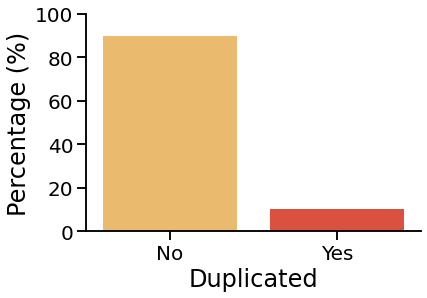

In [61]:
with sns.plotting_context('talk'):
    plt.figure(figsize=(6,4))
    sns.barplot(data=gMatchedListings, x='match', y='percentage', palette='YlOrRd')
    sns.despine()
    plt.xlabel('Duplicated', fontsize=24)
    plt.xticks([0,1],['No', 'Yes'], fontsize=20)
    plt.ylabel('Percentage (%)', fontsize=24)
    plt.ylim((0,100))
    plt.yticks(fontsize=20)
    plt.savefig('imbalance.png', dpi=300, bbox_inches="tight")


In [21]:
df_listings.head()

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean
0,1,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1
1,2,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2
2,3,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3
3,4,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4
4,5,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5


In [22]:
# merging to pair listings together, first merge: for id1 in matchedListings, second merge: for id2 (the pair)
df_pairedListings = df_matchedListings_clean.merge(df_listings, left_on='id1', right_on='id_clean', how='left').merge(df_listings, left_on='id2', right_on='id_clean', how='left')

In [23]:
df_pairedListings.head()

,id1,id2,match,id_list,id_x,sourceId_x,locationId_x,typeId_x,price_x,rooms_x,...,totalArea_y,livingArea_y,plotArea_y,terraceArea_y,title_y,description_y,features_y,latitude_y,longitude_y,id_clean_y
0,1,2,1,12,1,1.0,84.0,4.0,26500000.0,20.0,...,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2
1,1,3,1,13,1,1.0,84.0,4.0,26500000.0,20.0,...,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3
2,1,4,1,14,1,1.0,84.0,4.0,26500000.0,20.0,...,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4
3,1,5,1,15,1,1.0,84.0,4.0,26500000.0,20.0,...,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5
4,1,6,1,16,1,1.0,84.0,4.0,26500000.0,20.0,...,4000.0,NaN,820000.0,NaN,Unique Majorcan Rural Estate in Puigpunyent,"Description\n\t\t\t\tThis magnificent, totally...",NaN,NaN,NaN,6


In [24]:
# double check matches from sample columns
df_pairedListings[['id_clean_x','bathrooms_x','id_clean_y','bathrooms_y']].head(10)

,id_clean_x,bathrooms_x,id_clean_y,bathrooms_y
0,1,16.0,2,12.0
1,1,16.0,3,12.0
2,1,16.0,4,12.0
3,1,16.0,5,12.0
4,1,16.0,6,16.0
5,1,16.0,7,16.0
6,2,12.0,3,12.0
7,2,12.0,4,12.0
8,2,12.0,5,12.0
9,2,12.0,6,16.0


In [25]:
df_pairedListings['match'].value_counts(normalize=True)

0    0.896884
1    0.103116
Name: match, dtype: float64

In [26]:
df_pairedListings.shape

(1446921, 40)

In [27]:
df_matchedListings_clean.shape

(1446921, 4)

In [28]:
# drop features necessary from here. 